# Aranet Time-series Feature Extraction
The purpose of this notebook is to use feature extraction methods for picking our strongest regressors for predicting sequential time-series data for co2 levels.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as datetime

# Load Data

In [2]:
# Load the .npz file
loaded_data = np.load('../datasets/windows.npz', allow_pickle=True)

# Convert the loaded data back to a dictionary of lists of NumPy arrays, excluding 'column_names'
windows = {label: list(arrays) for label, arrays in loaded_data.items() if label != 'column_names'}


for label, windows_list in windows.items():
    print(f"Label: {label}, Number of windows: {len(windows_list)}")

# Extract the column names
column_names = loaded_data['column_names']

# Convert the loaded data back to a dictionary of lists of DataFrames, using the column names
windows_df = {label: [pd.DataFrame(array, columns=column_names) for array in arrays_list] 
              for label, arrays_list in loaded_data.items() if label != 'column_names'}

# Loop through windows_df and set 'Datetime' as the index
for label, windows_list in windows_df.items():
    for i, window in enumerate(windows_list):
        # Convert 'Datetime' to a datetime object
        window['Datetime'] = pd.to_datetime(window['Datetime'])

        # Set 'Datetime' as the index
        windows_df[label][i] = window.set_index('Datetime')

Label: Chen, Number of windows: 12
Label: Song, Number of windows: 13


In [3]:
print(column_names)

['Datetime' 'co2' 'tempF' 'rhumid' 'atmpr' 'door1' 'door2' 'hvac'
 'subject_count' 'lecturer']


In [4]:
# Print the shape of each DataFrame in the windows dictionary
for label, windows_list in windows.items():
    print(f"Label: {label}")
    for i, window in enumerate(windows_list):
        print(f"Window {i}: {window.shape}")


Label: Chen
Window 0: (76, 10)
Window 1: (76, 10)
Window 2: (76, 10)
Window 3: (76, 10)
Window 4: (76, 10)
Window 5: (76, 10)
Window 6: (76, 10)
Window 7: (76, 10)
Window 8: (76, 10)
Window 9: (76, 10)
Window 10: (76, 10)
Window 11: (76, 10)
Label: Song
Window 0: (76, 10)
Window 1: (76, 10)
Window 2: (76, 10)
Window 3: (76, 10)
Window 4: (76, 10)
Window 5: (76, 10)
Window 6: (76, 10)
Window 7: (76, 10)
Window 8: (76, 10)
Window 9: (76, 10)
Window 10: (76, 10)
Window 11: (76, 10)
Window 12: (76, 10)


In [5]:
windows['Chen'][0][:]

array([[Timestamp('2024-03-14 08:00:00'), 595.0, 65.8, 40.0, 1017.0, 1,
        1, 1, 10.0, 0],
       [Timestamp('2024-03-14 08:01:00'), 597.0, 66.4, 39.0, 1016.9, 1,
        1, 1, 10.0, 0],
       [Timestamp('2024-03-14 08:02:00'), 584.0, 66.8, 39.0, 1016.9, 1,
        1, 0, 16.0, 0],
       [Timestamp('2024-03-14 08:03:00'), 611.0, 67.2, 39.0, 1017.0, 1,
        1, 0, 16.0, 0],
       [Timestamp('2024-03-14 08:04:00'), 577.0, 67.5, 39.0, 1017.0, 1,
        1, 0, 16.0, 0],
       [Timestamp('2024-03-14 08:05:00'), 587.0, 67.8, 39.0, 1016.9, 1,
        1, 0, 16.0, 0],
       [Timestamp('2024-03-14 08:06:00'), 596.0, 67.9, 38.0, 1017.0, 1,
        1, 0, 16.0, 0],
       [Timestamp('2024-03-14 08:07:00'), 577.0, 68.2, 38.0, 1017.0, 1,
        1, 0, 16.0, 0],
       [Timestamp('2024-03-14 08:08:00'), 586.0, 68.4, 38.0, 1017.0, 1,
        1, 0, 18.0, 0],
       [Timestamp('2024-03-14 08:09:00'), 588.0, 68.5, 38.0, 1017.1, 1,
        1, 0, 18.0, 0],
       [Timestamp('2024-03-14 08:10:00')

In [6]:
windows_df['Chen'][0].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 76 entries, 2024-03-14 08:00:00 to 2024-03-14 09:15:00
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   co2            76 non-null     object
 1   tempF          76 non-null     object
 2   rhumid         76 non-null     object
 3   atmpr          76 non-null     object
 4   door1          76 non-null     object
 5   door2          76 non-null     object
 6   hvac           76 non-null     object
 7   subject_count  76 non-null     object
 8   lecturer       76 non-null     object
dtypes: object(9)
memory usage: 5.9+ KB


# Numpy Tensor

In [7]:
# Initialize a list to store the 3D arrays and labels
X_list = []
y_list = []

for label, windows_list in windows.items():
    for window in windows_list:
        # Convert each DataFrame to a NumPy array and append to the list
        X_list.append(window)
        # Append the corresponding label to the label list
        y_list.append(label)

# Convert the list of 3D arrays to a single 3D array (tensor)
X = np.array(X_list)

# Convert the label list to a NumPy array
y = np.array(y_list)

# Print the shapes of the resulting arrays
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")


Shape of X: (25, 76, 10)
Shape of y: (25,)


In [8]:
# Drop the first and the last columns from the 3D array X
X = X[:, :, 1:-1]

# Verify the new shape of X
print(f"New shape of X: {X.shape}")



New shape of X: (25, 76, 8)


In [9]:
X_reshaped = X.reshape(-1, X.shape[-1])
print(f"Reshaped X to: {X_reshaped.shape}")
X_original_shape = X_reshaped.reshape(X.shape)
print(f"Reshaped back to original shape: {X_original_shape.shape}")


Reshaped X to: (1900, 8)
Reshaped back to original shape: (25, 76, 8)


In [10]:
y

array(['Chen', 'Chen', 'Chen', 'Chen', 'Chen', 'Chen', 'Chen', 'Chen',
       'Chen', 'Chen', 'Chen', 'Chen', 'Song', 'Song', 'Song', 'Song',
       'Song', 'Song', 'Song', 'Song', 'Song', 'Song', 'Song', 'Song',
       'Song'], dtype='<U4')

In [11]:
y[0],X[0]

('Chen',
 array([[595.0, 65.8, 40.0, 1017.0, 1, 1, 1, 10.0],
        [597.0, 66.4, 39.0, 1016.9, 1, 1, 1, 10.0],
        [584.0, 66.8, 39.0, 1016.9, 1, 1, 0, 16.0],
        [611.0, 67.2, 39.0, 1017.0, 1, 1, 0, 16.0],
        [577.0, 67.5, 39.0, 1017.0, 1, 1, 0, 16.0],
        [587.0, 67.8, 39.0, 1016.9, 1, 1, 0, 16.0],
        [596.0, 67.9, 38.0, 1017.0, 1, 1, 0, 16.0],
        [577.0, 68.2, 38.0, 1017.0, 1, 1, 0, 16.0],
        [586.0, 68.4, 38.0, 1017.0, 1, 1, 0, 18.0],
        [588.0, 68.5, 38.0, 1017.1, 1, 1, 0, 18.0],
        [587.0, 68.5, 38.0, 1017.1, 1, 1, 0, 18.0],
        [599.0, 68.6, 37.0, 1017.2, 1, 1, 0, 18.0],
        [616.0, 68.7, 37.0, 1017.2, 1, 1, 0, 18.0],
        [596.0, 68.9, 37.0, 1017.2, 1, 1, 0, 18.0],
        [594.0, 68.9, 37.0, 1017.1, 1, 1, 0, 18.0],
        [612.0, 69.0, 37.0, 1017.2, 1, 1, 0, 18.0],
        [619.0, 69.0, 37.0, 1017.3, 1, 1, 0, 18.0],
        [615.0, 69.1, 37.0, 1017.2, 1, 1, 0, 18.0],
        [629.0, 69.1, 37.0, 1017.2, 1, 1, 1, 18.0],
   

## Sequential Classifier

Note that adding features such as moving averages was an easy way to increase the metrics of this model. We should discuss it further.

Test-train-split

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = X.astype(np.float64)
# Encode labels: 'Song' as 1, 'Chen' as 0
y = np.array([1 if label == 'Song' else 0 for label in y])
# Scale the features using StandardScaler

# Reshape X to 2D array
X_2d = X.reshape(-1, X.shape[-1])

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_2d)

# Reshape X_scaled back to 3D array
X_scaled_3d = X_scaled.reshape(X.shape[0], X.shape[1], X.shape[2])

# Split into training and test/validation sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_3d, y, test_size=6, random_state=42, stratify=y)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (19, 76, 8)
y_train shape: (19,)
X_test shape: (6, 76, 8)
y_test shape: (6,)


In [13]:
import tensorflow as tf

tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[76,8]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 608)               0         
                                                                 
 dense (Dense)               (None, 128)               77952     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
Total params: 88288 (344.88 KB)
Trainable params: 88288 (344.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='sgd',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=7, validation_data=(X_test, y_test))

Epoch 1/7


1/1 [==============================] - 1s 580ms/step - loss: 3.4306 - accuracy: 0.0000e+00 - val_loss: 3.3642 - val_accuracy: 0.0000e+00
Epoch 2/7
1/1 [==============================] - 0s 22ms/step - loss: 2.9864 - accuracy: 0.0526 - val_loss: 3.1036 - val_accuracy: 0.1667
Epoch 3/7
1/1 [==============================] - 0s 20ms/step - loss: 2.5893 - accuracy: 0.2105 - val_loss: 2.8599 - val_accuracy: 0.1667
Epoch 4/7
1/1 [==============================] - 0s 19ms/step - loss: 2.2216 - accuracy: 0.5263 - val_loss: 2.6366 - val_accuracy: 0.5000
Epoch 5/7
1/1 [==============================] - 0s 21ms/step - loss: 1.8936 - accuracy: 0.6316 - val_loss: 2.4422 - val_accuracy: 0.6667
Epoch 6/7
1/1 [==============================] - 0s 22ms/step - loss: 1.6061 - accuracy: 0.7895 - val_loss: 2.2696 - val_accuracy: 0.6667
Epoch 7/7
1/1 [==============================] - 0s 20ms/step - loss: 1.3599 - accuracy: 0.7895 - val_loss: 2.1227 - val_accuracy: 0.8333


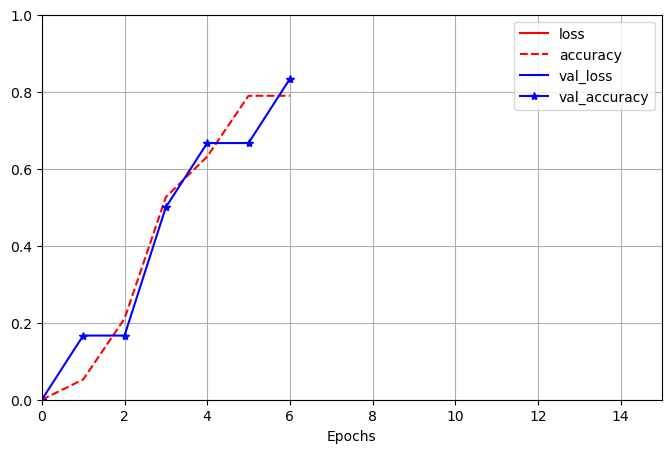

In [16]:
pd.DataFrame(history.history).plot(
    figsize=(8, 5),
    xlim=[0, 15], ylim=[0, 1], xlabel='Epochs', grid=True,
    style=['r', 'r--', 'b', 'b-*'])
plt.show()

In [17]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 17ms/step - loss: 2.1227 - accuracy: 0.8333


[2.1227006912231445, 0.8333333134651184]

In [18]:
y_proba = model.predict(X_test)
y_proba.round(2)

1/1 [==============================] - 0s 64ms/step


array([[0.11, 0.06, 0.01, 0.03, 0.02, 0.03, 0.02, 0.03, 0.03, 0.01, 0.02,
        0.01, 0.01, 0.02, 0.03, 0.02, 0.05, 0.03, 0.02, 0.02, 0.02, 0.02,
        0.02, 0.04, 0.03, 0.09, 0.02, 0.03, 0.02, 0.02, 0.02, 0.1 ],
       [0.06, 0.1 , 0.02, 0.02, 0.02, 0.05, 0.03, 0.06, 0.02, 0.01, 0.05,
        0.01, 0.02, 0.02, 0.03, 0.03, 0.05, 0.03, 0.01, 0.02, 0.02, 0.02,
        0.03, 0.06, 0.04, 0.07, 0.02, 0.01, 0.02, 0.02, 0.03, 0.03],
       [0.02, 0.58, 0.  , 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.02,
        0.  , 0.  , 0.02, 0.03, 0.01, 0.02, 0.01, 0.  , 0.02, 0.03, 0.  ,
        0.01, 0.06, 0.03, 0.02, 0.01, 0.  , 0.  , 0.  , 0.02, 0.01],
       [0.06, 0.12, 0.01, 0.04, 0.01, 0.04, 0.04, 0.03, 0.01, 0.01, 0.05,
        0.01, 0.01, 0.02, 0.02, 0.02, 0.05, 0.04, 0.02, 0.05, 0.01, 0.02,
        0.04, 0.02, 0.03, 0.03, 0.03, 0.01, 0.01, 0.03, 0.03, 0.07],
       [0.22, 0.11, 0.01, 0.03, 0.  , 0.04, 0.02, 0.01, 0.01, 0.01, 0.06,
        0.01, 0.01, 0.02, 0.02, 0.04, 0.03, 0.04, 0.01, 0.

In [19]:
y_pred = np.argmax(y_proba, axis=1)
y_pred, y_test

(array([0, 1, 1, 1, 0, 1], dtype=int64), array([0, 1, 1, 1, 0, 0]))

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_classification(y_true, y_pred, average='macro'):
    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average=average)
    recall = recall_score(y_true, y_pred, average=average)
    f1 = f1_score(y_true, y_pred, average=average)
    
    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    
    # Return metrics as a dictionary
    return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1_score': f1}

# Example usage (ensure y_test and y_pred are defined appropriately)
metrics = evaluate_classification(y_test, y_pred)


Accuracy: 0.8333
Precision: 0.8750
Recall: 0.8333
F1-score: 0.8286


In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_classification(y_true, y_pred):
    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    
    # Return metrics as a dictionary
    return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1_score': f1}

# Example usage
# metrics = evaluate_classification(y_test, y_pred)


# RNN Sequential

In [22]:
M = X.copy()
print("Shape of our sequenced samples M:", M.shape)

# Assuming M is already defined and has shape (25, 76, 20)
# Set the seed for reproducibility and split the data
M_train, M_test = train_test_split(M, test_size=0.2, random_state=42)

# Print shapes to confirm the setup
print("M_train shape:", M_train.shape)  # Expected to have around 80% of the data
print("M_test shape:", M_test.shape)    # Expected to have around 20% of the data



Shape of our sequenced samples M: (25, 76, 8)
M_train shape: (20, 76, 8)
M_test shape: (5, 76, 8)


In [23]:
# Calculating the split index for 90% of the time steps
split_index = int(0.9 * 76)  

# Splitting the training data
X_train = M_train[:, :split_index, :]
y_train = M_train[:, split_index:, :]

# Splitting the testing data
X_test = M_test[:, :split_index, :]
y_test = M_test[:, split_index:, :]

# Print shapes to confirm the setup
print("X_train shape:", X_train.shape)  
print("y_train shape:", y_train.shape)  
print("X_test shape:", X_test.shape)    
print("y_test shape:", y_test.shape)    



X_train shape: (20, 68, 8)
y_train shape: (20, 8, 8)
X_test shape: (5, 68, 8)
y_test shape: (5, 8, 8)


In [24]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

# Print shapes for debugging
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Set random seed for reproducibility
tf.random.set_seed(42)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(60, activation='relu', input_shape=(68, 8)),  # Input layer
    tf.keras.layers.Dense(64, activation='relu'),  # Hidden layer
    tf.keras.layers.Dense(8 * 8, activation=None)  # Output layer to predict 16 timesteps, each with 20 features
])
model.add(tf.keras.layers.Reshape((8, 8)))  # Reshape output to match (16, 20)

# Define early stopping callback
early_stopping = EarlyStopping(monitor='mae', patience=40, restore_best_weights=True)

# Define optimizer
opt = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)

# Compile the model
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test), callbacks=[early_stopping])



X_train shape: (20, 68, 8)
y_train shape: (20, 8, 8)
X_test shape: (5, 68, 8)
y_test shape: (5, 8, 8)
Epoch 1/1000
1/1 [==============================] - 1s 657ms/step - loss: 306809.4375 - mae: 360.0116 - val_loss: 228873.1719 - val_mae: 251.5710
Epoch 2/1000
1/1 [==============================] - 0s 24ms/step - loss: 219880.2031 - mae: 245.8723 - val_loss: 226119.9531 - val_mae: 250.0952
Epoch 3/1000
1/1 [==============================] - 0s 23ms/step - loss: 217186.5000 - mae: 244.3941 - val_loss: 222317.5469 - val_mae: 248.0183
Epoch 4/1000
1/1 [==============================] - 0s 23ms/step - loss: 213467.2031 - mae: 242.3175 - val_loss: 217610.8281 - val_mae: 245.3977
Epoch 5/1000
1/1 [==============================] - 0s 23ms/step - loss: 208864.6719 - mae: 239.6954 - val_loss: 212137.5781 - val_mae: 242.2912
Epoch 6/1000
1/1 [==============================] - 0s 24ms/step - loss: 203514.2188 - mae: 236.5868 - val_loss: 206027.2812 - val_mae: 238.7568
Epoch 7/1000
1/1 [=========

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predictions on test set
y_pred = model.predict(X_test)

# Flatten the predictions and actual values for metric calculations
y_true_flat = y_test.reshape(-1)
y_pred_flat = y_pred.reshape(-1)

# Calculate metrics
test_mae = mean_absolute_error(y_true_flat, y_pred_flat)
test_rmse = np.sqrt(mean_squared_error(y_true_flat, y_pred_flat))
test_r2 = r2_score(y_true_flat, y_pred_flat)

# Print the metrics
print(f'Test MAE: {test_mae:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')
print(f'Test R-squared: {test_r2:.4f}')


# Extracting predictions for CO2 (assuming it's the first column in the output)
y_pred_co2 = y_pred[:, :, 0]  # Adjust the index if CO2 is not the first column
y_true_co2 = y_test[:, :, 0]

# Flatten the CO2 predictions and actual values
y_true_co2_flat = y_true_co2.reshape(-1)
y_pred_co2_flat = y_pred_co2.reshape(-1)

# Calculate metrics for CO2
test_mae_co2 = mean_absolute_error(y_true_co2_flat, y_pred_co2_flat)
test_rmse_co2 = np.sqrt(mean_squared_error(y_true_co2_flat, y_pred_co2_flat))
test_r2_co2 = r2_score(y_true_co2_flat, y_pred_co2_flat)

# Print the metrics for CO2
print(f'Test MAE for CO2: {test_mae_co2:.4f}')
print(f'Test RMSE for CO2: {test_rmse_co2:.4f}')
print(f'Test R-squared for CO2: {test_r2_co2:.4f}')


1/1 [==============================] - 0s 96ms/step
Test MAE: 23.8852
Test RMSE: 74.4112
Test R-squared: 0.9668
Test MAE for CO2: 176.2553
Test RMSE for CO2: 210.2649
Test R-squared for CO2: -0.0393


In [26]:
import numpy as np
from sklearn.metrics import r2_score

def calculate_r2_per_feature(y_true, y_pred):
    """
    Calculates the R-squared score for each feature across all timesteps.
    Args:
    y_true (numpy.ndarray): True values of the test set.
    y_pred (numpy.ndarray): Predicted values from the model.
    
    Returns:
    dict: A dictionary with feature indices as keys and R-squared scores as values.
    """
    r2_scores = {}
    for feature_index in range(y_true.shape[2]):  # Assuming the last dimension represents features
        y_true_feature = y_true[:, :, feature_index].reshape(-1)
        y_pred_feature = y_pred[:, :, feature_index].reshape(-1)
        r2_scores[feature_index] = r2_score(y_true_feature, y_pred_feature)
    return r2_scores


In [27]:
# Assuming y_test and y_pred are already defined and contain the test and predicted data respectively.
r2_scores = calculate_r2_per_feature(y_test, y_pred)
print("R-squared scores for each feature:", r2_scores)


R-squared scores for each feature: {0: -0.03932300212635642, 1: -0.050773993432953635, 2: 0.05378577847280164, 3: -0.12903187993918763, 4: -0.09384669179137317, 5: -0.031125155855460163, 6: -0.1415820417935154, 7: 0.043417261266940343}


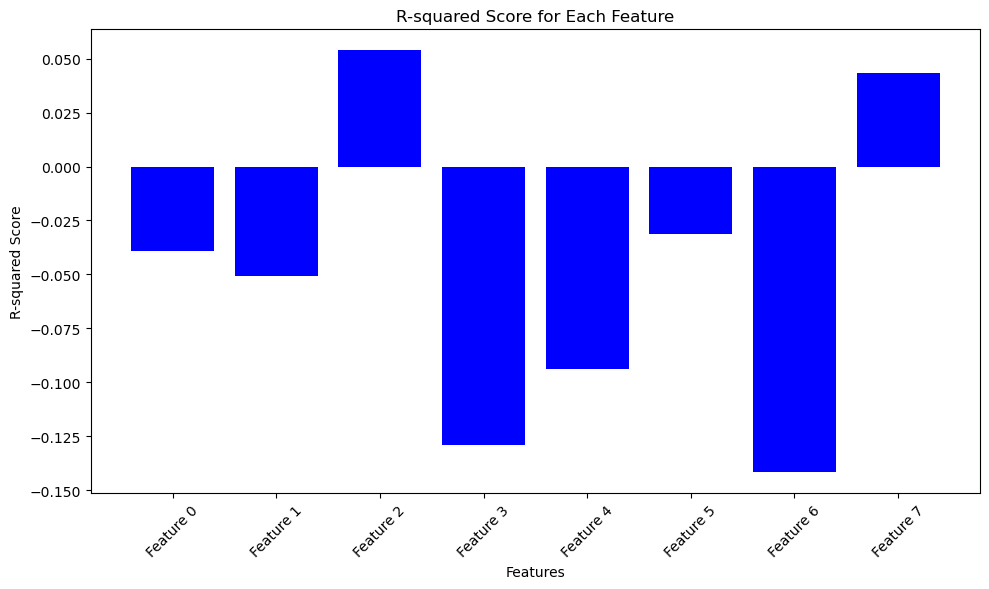

In [28]:
import matplotlib.pyplot as plt

# Extract feature names if available or use generic names
feature_names = ['Feature {}'.format(i) for i in range(y_test.shape[2])]  # Adjust or replace with actual names

# Extract R2 values and sort by value
r2_values = [r2_scores[i] for i in sorted(r2_scores)]

plt.figure(figsize=(10, 6))
plt.bar(feature_names, r2_values, color='blue')
plt.xlabel('Features')
plt.ylabel('R-squared Score')
plt.title('R-squared Score for Each Feature')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to make room for label rotation
plt.show()


## LSTM

In [29]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

# Set random seed for reproducibility
tf.random.set_seed(42)

# Define the LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(128, activation='relu', input_shape=(68, 8)),  # LSTM layer
    tf.keras.layers.Dense(64, activation='relu'),  # Hidden layer
    tf.keras.layers.Dense(8 * 8, activation=None)  # Output layer to predict 8 timesteps, each with 20 features
])
model.add(tf.keras.layers.Reshape((8, 8)))  # Reshape output to match (8, 20)

# Define early stopping callback
early_stopping = EarlyStopping(monitor='mae', patience=40, restore_best_weights=True)

# Define optimizer
opt = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)

# Compile the model
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test), callbacks=[early_stopping])


Epoch 1/1000
1/1 [==============================] - 1s 811ms/step - loss: 59985436672.0000 - mae: 109228.8359 - val_loss: 384901.1875 - val_mae: 494.6037
Epoch 2/1000
1/1 [==============================] - 0s 37ms/step - loss: 375081.9062 - mae: 488.8295 - val_loss: 788179.8750 - val_mae: 728.9797
Epoch 3/1000
1/1 [==============================] - 0s 35ms/step - loss: 777678.8125 - mae: 723.3014 - val_loss: 1359951.6250 - val_mae: 950.7571
Epoch 4/1000
1/1 [==============================] - 0s 37ms/step - loss: 1348871.5000 - mae: 945.1758 - val_loss: 2035990.0000 - val_mae: 1156.8916
Epoch 5/1000
1/1 [==============================] - 0s 36ms/step - loss: 2024424.7500 - mae: 1151.4064 - val_loss: 2765576.5000 - val_mae: 1348.9908
Epoch 6/1000
1/1 [==============================] - 0s 35ms/step - loss: 2753613.2500 - mae: 1343.5536 - val_loss: 3509282.5000 - val_mae: 1519.1582
Epoch 7/1000
1/1 [==============================] - 0s 33ms/step - loss: 3496999.5000 - mae: 1513.8179 - val_

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate_regression_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R-squared (R^2): {r2:.4f}")
    
    return {'mse': mse, 'mae': mae, 'rmse': rmse, 'r2': r2}


# Predict on the test set
# y_pred = model.predict(X_test)

# # Flatten y_pred and y_test if necessary (depends on your model's output shape)
# y_pred = y_pred.reshape(-1, 20)  # Adjust the reshape parameters based on your specific output configuration
# y_test = y_test.reshape(-1, 20)  # Adjust the reshape parameters accordingly

# # Evaluate the model
# metrics = evaluate_regression_metrics(y_test, y_pred)


add l2 regularization and recurrent dropout to check for overfitting

In [31]:
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

# Set random seed for reproducibility
tf.random.set_seed(42)

# Define the LSTM model with dropout
model = tf.keras.Sequential([
    # Adding dropout and recurrent dropout to the LSTM layer
    tf.keras.layers.LSTM(128, activation='relu', input_shape=(68, 8),
                         dropout=0.2, recurrent_dropout=0.2),
    # Adding L2 regularization to the Dense layer
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    # Output layer to predict 8 timesteps, each with 20 features
    tf.keras.layers.Dense(8 * 8, activation=None)
])
model.add(tf.keras.layers.Reshape((8, 8)))  # Reshape output to match (8, 20)

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_mae', patience=10, restore_best_weights=True)

# Define optimizer
opt = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)

# Compile the model
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test), callbacks=[early_stopping])


Epoch 1/500
1/1 [==============================] - 2s 2s/step - loss: 527211.2500 - mae: 502.6497 - val_loss: 56132936.0000 - val_mae: 251.6075
Epoch 2/500
1/1 [==============================] - 0s 57ms/step - loss: 56123944.0000 - mae: 245.9087 - val_loss: nan - val_mae: 250.2221
Epoch 3/500
1/1 [==============================] - 0s 60ms/step - loss: nan - mae: 244.5217 - val_loss: nan - val_mae: 248.2234
Epoch 4/500
1/1 [==============================] - 0s 54ms/step - loss: nan - mae: 242.5238 - val_loss: nan - val_mae: 245.6696
Epoch 5/500
1/1 [==============================] - 0s 55ms/step - loss: nan - mae: 239.9686 - val_loss: nan - val_mae: 242.6217
Epoch 6/500
1/1 [==============================] - 0s 57ms/step - loss: nan - mae: 236.9191 - val_loss: nan - val_mae: 239.1386
Epoch 7/500
1/1 [==============================] - 0s 53ms/step - loss: nan - mae: 233.4346 - val_loss: nan - val_mae: 235.2783
Epoch 8/500
1/1 [==============================] - 0s 52ms/step - loss: nan - 

In [32]:
# Assume y_pred is obtained from the model prediction on X_test
y_pred = model.predict(X_test)

# If necessary, flatten y_pred and y_test to ensure they are 2D arrays of shape (samples, features)
y_pred = y_pred.reshape(-1, 20)
y_test = y_test.reshape(-1, 20)

# Evaluate the model using the defined metrics function
metrics = evaluate_regression_metrics(y_test, y_pred)

# Print the performance report
print("Performance Report:")
print(f"Mean Squared Error (MSE): {metrics['mse']:.4f}")
print(f"Mean Absolute Error (MAE): {metrics['mae']:.4f}")
print(f"Root Mean Squared Error (RMSE): {metrics['rmse']:.4f}")
print(f"R-squared (R²): {metrics['r2']:.4f}")


1/1 [==============================] - 0s 144ms/step
Mean Squared Error (MSE): 5530.9769
Mean Absolute Error (MAE): 23.8289
Root Mean Squared Error (RMSE): 74.3705
R-squared (R^2): 0.9700
Performance Report:
Mean Squared Error (MSE): 5530.9769
Mean Absolute Error (MAE): 23.8289
Root Mean Squared Error (RMSE): 74.3705
R-squared (R²): 0.9700


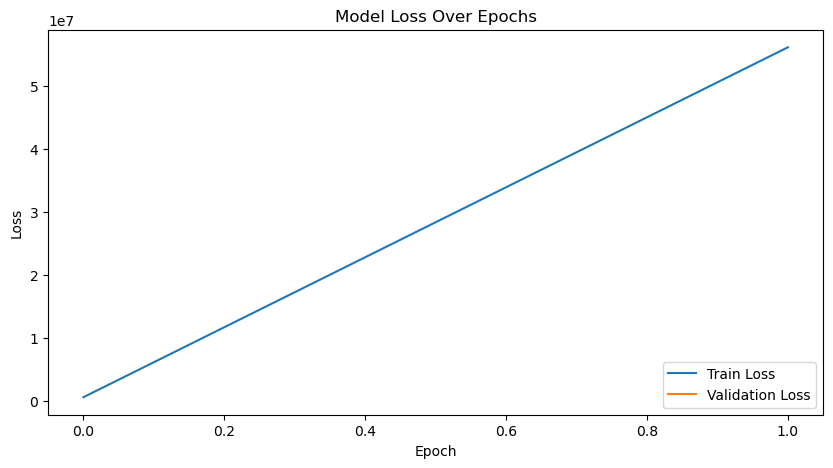

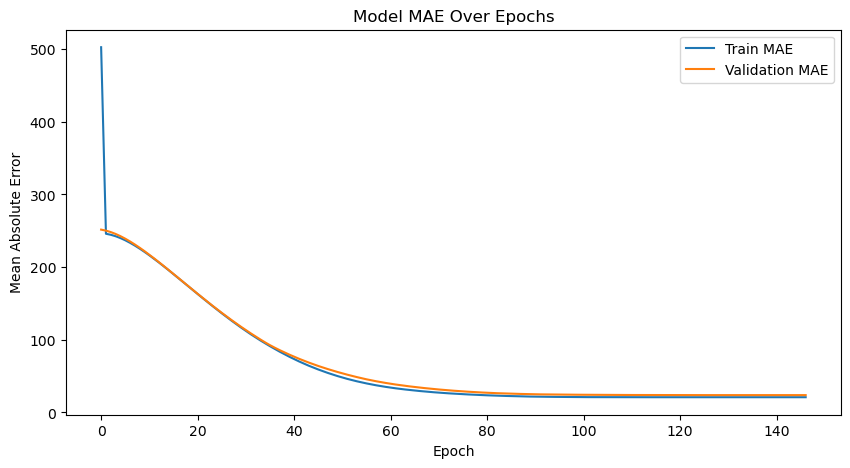

In [33]:
import matplotlib.pyplot as plt

# Plotting the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plotting the MAE
plt.figure(figsize=(10, 5))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE Over Epochs')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend()
plt.show()


## co2 RNN

In [34]:
# Adjusting the dataset to focus only on CO2
X_train_co2 = X_train[:, :, 0]  # Taking only the first feature from X_train
y_train_co2 = y_train[:, :, 0]  # Taking only the first feature from y_train
X_test_co2 = X_test[:, :, 0]    # Taking only the first feature from X_test
y_test_co2 = y_test[:, :, 0]    # Taking only the first feature from y_test

# Re-define and compile the model
model_co2 = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(60, activation='relu', input_shape=(60, 1)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(16, activation=None)
])

opt = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)
model_co2.compile(loss='mean_squared_error', optimizer=opt, metrics=['mae'])

# Re-train the model
history_co2 = model_co2.fit(X_train_co2, y_train_co2, epochs=1000, validation_data=(X_test_co2, y_test_co2), callbacks=[early_stopping])


IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predictions on test set
y_pred_co2 = model_co2.predict(X_test_co2)

# Flatten the predictions and actual values for metric calculations
y_true_co2_flat = y_test_co2.reshape(-1)
y_pred_co2_flat = y_pred_co2.reshape(-1)

# Calculate metrics
test_mae_co2 = mean_absolute_error(y_true_co2_flat, y_pred_co2_flat)
test_rmse_co2 = np.sqrt(mean_squared_error(y_true_co2_flat, y_pred_co2_flat))
test_r2_co2 = r2_score(y_true_co2_flat, y_pred_co2_flat)

# Print the metrics
print(f'Test MAE for CO2: {test_mae_co2:.4f}')
print(f'Test RMSE for CO2: {test_rmse_co2:.4f}')
print(f'Test R-squared for CO2: {test_r2_co2:.4f}')


Not great with co2 alone, lets add the lecture columns and just co2 rolling averages

## Shorter Sequences and More Samples

<span style="color:red"> Calculating the moving averages before partitioning the data means that the moving averages for the training set are influenced by the test set data. This is a form of data leakage because when you train the model, it has access to information it wouldn't have in a real-world scenario, where future data points aren't available at the time of prediction.</span>

Next we will create resampling methods which maintain sequence data integrity. We will then create local rolling, shift, and diff models so as to avoid data leakage into the test set.

In [ ]:
M.shape

(25, 76, 8)

In [ ]:
76/4, 76 // 15, 76 % 15, 76 // 20, 76 % 20

In [ ]:
def find_divisors(n):
    divisors = [i for i in range(1, n + 1) if n % i == 0]
    return divisors

# Find divisors of 76
divisors_of_76 = find_divisors(76)
print("Divisors of 76:", divisors_of_76)


In [ ]:
import numpy as np

# Example matrix M with shape (25, 76, 20)
T = np.random.rand(25, 76, 20)  # Replace this with your actual matrix M

# Drop the last record to make it 75 (for simplicity in division)
T = T[:, :75, :]

# Reshape M to split into 5 parts of 15 records each
S = T.reshape(25, 5, 15, 20)

print("New shape of S:", S.shape)


In [ ]:
# We want to merge the first two dimensions to have a shape of (125, 15, 20)

# Reshape S by combining the first two dimensions
R = S.reshape(-1, 15, 20)  # -1 for numpy to calculate the appropriate size automatically

print("Shape of R:", R.shape)

The `tf.data` API

In [ ]:
import tensorflow as tf
dataset = tf.data.Dataset.from_tensor_slices(M)
dataset

<_TensorSliceDataset element_spec=TensorSpec(shape=(76, 8), dtype=tf.float64, name=None)>

In [ ]:
for item in dataset:
    print(item.shape)

(76, 8)
(76, 8)
(76, 8)
(76, 8)
(76, 8)
(76, 8)
(76, 8)
(76, 8)
(76, 8)
(76, 8)
(76, 8)
(76, 8)
(76, 8)
(76, 8)
(76, 8)
(76, 8)
(76, 8)
(76, 8)
(76, 8)
(76, 8)
(76, 8)
(76, 8)
(76, 8)
(76, 8)
(76, 8)
